# GET THE DICTONARY OF JAPENESE WORDS

In [2]:
# Open the file 'ja_gsd-ud-train.conllu' for reading
with open('ja_gsd-ud-train.conllu') as f:
    
    # Initialize an index variable i
    i=0

    # Initialize a list to store words
    word_dict=[]

    # Iterate through each line in the file
    for line in f.readlines():
        # Split the line by tab character ('\t')
        sp = line.strip().split('\t')

        # Check if the line contains 10 elements
        if len(sp) == 10:
            # Append the TOKEN to the word_dict list
            word_dict.append(sp[1])


In [4]:
len(word_dict)

168333

# Extract sentences for Tokenization Algo

In [5]:
import re

test_text = []

with open('ja_gsd-ud-test.conllu') as f:
    for line in f:
        if line.startswith('# text ='):
            test_text.append(re.sub(r'^# text = ', '', line.strip()))

In [6]:
test_text

['これに不快感を示す住民はいましたが,現在,表立って反対や抗議の声を挙げている住民はいないようです。',
 '幸福の科学側からは,特にどうしてほしいという要望はいただいていません。',
 '星取り参加は当然とされ,不参加は白眼視される。',
 '室長の対応には終始誠実さが感じられた。',
 '多くの女性が生理のことで悩んでいます。',
 '先生の理想は限りなく高い。',
 'それは兎も角,私も明日の社説を楽しみにしております。',
 'そうだったらいいなあとは思いますが,日本学術会議の会長談話について“当会では,標記の件について,以下のように考えます。”',
 '教団にとっては存続が厳しくなると思う。',
 'しかし強制していなくても問題です',
 '民族派のみなさんにとって陛下はいちばん大切な方ですから,その霊言について“あり得ない”という前提でお話をされる。',
 '新しい産業構造を作らなければいけない。',
 '心がないんだ。',
 'そのモサは今何をしているか。',
 '本音としてはこの火に油を注ぎたいけれど。',
 '25日も楽しみにされてください。',
 'なんだよなんだよぉ~,わが署に来たのなら教えてくれよぉ~。',
 'どの本もツッコミどころが山ほどあり,会場内が爆笑の連続でした。',
 '社会への恨みと,破滅させたいという恐ろしいほどの煩悩。',
 'とんでもない。',
 '抗議デモの継続を宣言した統一教会,日本でも韓国東亜日報の様に襲撃事件が起こる惧れはないのか?',
 'ついつい言葉だけで机上の空論をこねがちな自分は,ここは激しく自戒ですね...',
 '当選して市長になってもなお,摂理との関係を明らかにしようとしないのは,とても残念。',
 'この夏が実は最大の山場になります。',
 '政府がもっと宗教法人の定義を厳しくし,こういう団体は排除すべき。',
 'まあ,それが親心だ。',
 '大川隆法氏を支持する人が挙げた主な理由は,以下のとおり。',
 'すごくそういうところを引っかかる感じですか?',
 'この記事が本当ならいくつかの問題がはっきり見えてきます。',
 '今,何もそれは達成されていない。',
 '身勝手すぎる。',
 '大人と子供では体質が違うので,“大人に良いものが子供にもいい”とは必ずしもいえません。',
 '愛人がいた

# Create the Match Algorithm

The MaxMatch method is a significant natural language processing approach for tokenizing sentences with no explicit word delimiters.

The MaxMatch algorithm implementation given consists of a single function named **'matalgo(sentence, dict1)'**. This function accepts two parameters:

- **'sentence'**: A string that represents the input sentence to be tokenized.
- **'dict1'**: A dictionary or list of terms that will be used as a reference during the tokenization process.

The function starts by determining whether the **'sentence'** is empty. If it is, the method produces an empty list, indicating that no tokens could be extracted.

The function then creates an empty list called **'tokens'** to hold the tokens extracted from the input phrase.

The code then starts a loop that iterates over the input sentence's substrings in descending order of length. It extracts a substring **'sub_text'** and the remaining part of the phrase **'rem_word'** for each iteration.

The implementation checks if **'sub_text'** exists in the given **'dict1'** during the loop. If it does, it signifies that the token **'sub_text'** is legitimate. This token is then added to the **'tokens'** list.

If a part of the sentence remains (**'rem_word'**), the function recursively runs itself with **'rem_word'** and appends the resulting tokens to the list of **'tokens'**. 

The loop terminates after identifying the longest valid token, and the process is repeated for the rest of the phrase.

Finally, the method returns a list of tokens as its result. Note: Invalid inputs, such as missing dictionaries, are not handled by the implementation.

In [9]:
def maxalgo(sentence, dict1):
    
    # Check if the sentence is empty
    if not sentence:
        return []
    
    
    # Initialize a list to store tokens
    tokens = []
    
     # Iterate over substrings of the sentence
    for i in range(len(sentence), 0, -1):
        sub_text = sentence[:i] # Extract a substring
        rem_word = sentence[i:]  # Extract the remaining part
        
         
         # Check if the substring is in the dictionary
        if sub_text in dict1:
            tokens.append(sub_text)  # Add the valid token to the list
            
            # If there is a remaining part, recursively tokenize it
            if rem_word:
                tokens.extend(maxalgo(rem_word, dict1))
            break
    

    return tokens


Initially i took 20,000 training words but with that I was getting very less tokens so I changed it to entire word dictionary

With 20,000 training words-
['これ', 'に', '不'],

With all training words-
[
'これ',
  'に',
  '不快',
  '感',
  'を',
  '示す',
  '住民',
  'はい',
  'まし',
  'た',
  'が',
  ',',
  '現在',
  ',',
  '表',
  '立っ',
  'て',
  '反対',
  'や',
  '抗議',
  'の',
  '声',
  'を',
  '挙げ',
  'て',
  'いる',
  '住民',
  'はい',
  'ない',
  'よう',
  'です',
  '。']

In [10]:
#just to see the process time
from tqdm import tqdm

segment_text = []

for sentence in tqdm(test_text, desc="Segmenting Text"):
    segment_text.append(maxalgo(sentence, word_dict))


Segmenting Text: 100%|████████████████████████| 543/543 [05:24<00:00,  1.67it/s]


In [11]:
segment_text

[['これ',
  'に',
  '不快',
  '感',
  'を',
  '示す',
  '住民',
  'はい',
  'まし',
  'た',
  'が',
  ',',
  '現在',
  ',',
  '表',
  '立っ',
  'て',
  '反対',
  'や',
  '抗議',
  'の',
  '声',
  'を',
  '挙げ',
  'て',
  'いる',
  '住民',
  'はい',
  'ない',
  'よう',
  'です',
  '。'],
 ['幸福', 'の', '科学', '側', 'から', 'は', ',', '特に', 'どう', 'し', 'て', 'ほしい', 'とい'],
 ['星', '取り', '参加', 'は', '当然', 'と', 'さ', 'れ', ',', '不', '参加', 'は', '白'],
 ['室長', 'の', '対応', 'に', 'は', '終始', '誠実', 'さ', 'が', '感じ', 'られ', 'た', '。'],
 ['多く', 'の', '女性', 'が', '生', '理', 'の', 'こと', 'で', '悩ん', 'で', 'いま', 'す', '。'],
 ['先生', 'の', '理想', 'は', '限り', 'なく', '高い', '。'],
 ['それ', 'は'],
 ['そう',
  'だっ',
  'たら',
  'いい',
  'なあ',
  'と',
  'は',
  '思い',
  'ます',
  'が',
  ',',
  '日本',
  '学術',
  '会議',
  'の',
  '会長',
  '談',
  '話',
  'に',
  'つい',
  'て',
  '“',
  '当会',
  'で',
  'は',
  ',',
  '標記',
  'の',
  '件',
  'に',
  'つい',
  'て',
  ',',
  '以下',
  'の',
  'よう',
  'に',
  '考え',
  'ます',
  '。',
  '”'],
 ['教団', 'に', 'とっ', 'て', 'は', '存続', 'が', '厳しく', 'なる', 'と', '思う', '。'],
 ['しかし', '強制', 'し',

# Generate the Reference Token words

In [12]:
# we need to extract reference token to check whether the segment token we got are right or wrong. It will be similaras extracting words from training set.
with open('ja_gsd-ud-test.conllu') as f:
  
    test_word= []

    for line in f.readlines():
        sp = line.strip().split('\t')
        if len(sp) == 10:
            current_line.append(sp[1])
        if line.startswith('# text ='):
             if not test_word:
                    current_line=[]
             test_word.append(current_line)
             current_line=[]
    test_word.append(current_line)
        

# Evaluate The Performance with WER

In [1]:
#The below code is rReferenced from the code provided on github- https://github.com/zszyellow/WER-in-python

In [21]:
import sys
import numpy

def editDistance(r, h):
    '''
    This function is to calculate the edit distance of reference sentence and the hypothesis sentence.

    Main algorithm used is dynamic programming.

    Attributes: 
        r -> the list of words produced by splitting reference sentence.
        h -> the list of words produced by splitting hypothesis sentence.
    '''
    d = numpy.zeros((len(r)+1)*(len(h)+1), dtype=numpy.uint8).reshape((len(r)+1, len(h)+1))
    for i in range(len(r)+1):
        d[i][0] = i
    for j in range(len(h)+1):
        d[0][j] = j
    for i in range(1, len(r)+1):
        for j in range(1, len(h)+1):
            if r[i-1] == h[j-1]:
                d[i][j] = d[i-1][j-1]
            else:
                substitute = d[i-1][j-1] + 1
                insert = d[i][j-1] + 1
                delete = d[i-1][j] + 1
                d[i][j] = min(substitute, insert, delete)
    return d

def getStepList(r, h, d):
    '''
    This function is to get the list of steps in the process of dynamic programming.

    Attributes: 
        r -> the list of words produced by splitting reference sentence.
        h -> the list of words produced by splitting hypothesis sentence.
        d -> the matrix built when calulating the editting distance of h and r.
    '''
    x = len(r)
    y = len(h)
    list = []
    while True:
        if x == 0 and y == 0: 
            break
        elif x >= 1 and y >= 1 and d[x][y] == d[x-1][y-1] and r[x-1] == h[y-1]: 
            list.append("e")
            x = x - 1
            y = y - 1
        elif y >= 1 and d[x][y] == d[x][y-1]+1:
            list.append("i")
            x = x
            y = y - 1
        elif x >= 1 and y >= 1 and d[x][y] == d[x-1][y-1]+1:
            list.append("s")
            x = x - 1
            y = y - 1
        else:
            list.append("d")
            x = x - 1
            y = y
    return list[::-1]

def alignedPrint(list, r, h, result):
    '''
    This funcition is to print the result of comparing reference and hypothesis sentences in an aligned way.
    
    Attributes:
        list   -> the list of steps.
        r      -> the list of words produced by splitting reference sentence.
        h      -> the list of words produced by splitting hypothesis sentence.
        result -> the rate calculated based on edit distance.
    '''
    print("REF:", end=" ")
    for i in range(len(list)):
        if list[i] == "i":
            count = 0
            for j in range(i):
                if list[j] == "d":
                    count += 1
            index = i - count
            print(" "*(len(h[index])), end=" ")
        elif list[i] == "s":
            count1 = 0
            for j in range(i):
                if list[j] == "i":
                    count1 += 1
            index1 = i - count1
            count2 = 0
            for j in range(i):
                if list[j] == "d":
                    count2 += 1
            index2 = i - count2
            if len(r[index1]) < len(h[index2]):
                print(r[index1] + " " * (len(h[index2])-len(r[index1])), end=" ")
            else:
                print(r[index1], end=" "),
        else:
            count = 0
            for j in range(i):
                if list[j] == "i":
                    count += 1
            index = i - count
            print(r[index], end=" "),
    print("\nHYP:", end=" ")
    for i in range(len(list)):
        if list[i] == "d":
            count = 0
            for j in range(i):
                if list[j] == "i":
                    count += 1
            index = i - count
            print(" " * (len(r[index])), end=" ")
        elif list[i] == "s":
            count1 = 0
            for j in range(i):
                if list[j] == "i":
                    count1 += 1
            index1 = i - count1
            count2 = 0
            for j in range(i):
                if list[j] == "d":
                    count2 += 1
            index2 = i - count2
            if len(r[index1]) > len(h[index2]):
                print(h[index2] + " " * (len(r[index1])-len(h[index2])), end=" ")
            else:
                print(h[index2], end=" ")
        else:
            count = 0
            for j in range(i):
                if list[j] == "d":
                    count += 1
            index = i - count
            print(h[index], end=" ")
    print("\nEVA:", end=" ")
    for i in range(len(list)):
        if list[i] == "d":
            count = 0
            for j in range(i):
                if list[j] == "i":
                    count += 1
            index = i - count
            print("D" + " " * (len(r[index])-1), end=" ")
        elif list[i] == "i":
            count = 0
            for j in range(i):
                if list[j] == "d":
                    count += 1
            index = i - count
            print("I" + " " * (len(h[index])-1), end=" ")
        elif list[i] == "s":
            count1 = 0
            for j in range(i):
                if list[j] == "i":
                    count1 += 1
            index1 = i - count1
            count2 = 0
            for j in range(i):
                if list[j] == "d":
                    count2 += 1
            index2 = i - count2
            if len(r[index1]) > len(h[index2]):
                print("S" + " " * (len(r[index1])-1), end=" ")
            else:
                print("S" + " " * (len(h[index2])-1), end=" ")
        else:
            count = 0
            for j in range(i):
                if list[j] == "i":
                    count += 1
            index = i - count
            print(" " * (len(r[index])), end=" ")
    print("\nWER: " + result)

def wer(r, h):
    """
    This is a function that calculate the word error rate in ASR.
    You can use it like this: wer("what is it".split(), "what is".split()) 
    """
    # build the matrix
    d = editDistance(r, h)

    # find out the manipulation steps
    list = getStepList(r, h, d)

    # print the result in aligned way
    result = float(d[len(r)][len(h)]) / len(r) * 100
    result = str("%.2f" % result) + "%"
    alignedPrint(list, r, h, result)
    return result




First, prepare the data by flattening lists of token into a sentence like structure, forming reference_flat and hypothesis_flat. 

The code then proceeds to calculate the WER scores by iterating through the flattened lists. For each pair of reference and hypothesis texts, the WER score is computed using the function wer(ref, hyp) and appended to the data list and finally store the results in csv. Later I made a histogram to compare the results

In [41]:
import csv

reference_flat = [''.join(sentence) for sentence in test_word[1:]]
hypothesis_flat = [''.join(sentence) for sentence in segment_text]

# Create a list to hold the data
data = []

# Iterate through the lists and calculate WER
for ref, hyp in zip(reference_flat, hypothesis_flat):
    wer_score = wer(ref, hyp)
    data.append([ref, hyp, wer_score])

# Define the CSV file path
csv_file = "wer_scores.csv"

# Write the data to a CSV file
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Reference Text", "Hypothesis Text", "WER Score"])
    for row in data:
        writer.writerow(row)

REF: こ れ に 不 快 感 を 示 す 住 民 は い ま し た が , 現 在 , 表 立 っ て 反 対 や 抗 議 の 声 を 挙 げ て い る 住 民 は い な い よ う で す 。 
HYP: こ れ に 不 快 感 を 示 す 住 民 は い ま し た が , 現 在 , 表 立 っ て 反 対 や 抗 議 の 声 を 挙 げ て い る 住 民 は い な い よ う で す 。 
EVA:                                                                                                   
WER: 0.00%
REF: 幸 福 の 科 学 側 か ら は , 特 に ど う し て ほ し い と い う 要 望 は い た だ い て い ま せ ん 。 
HYP: 幸 福 の 科 学 側 か ら は , 特 に ど う し て ほ し い と                     い         
EVA:                                         D D D D D D D D D D   D D D D 
WER: 40.00%
REF: 星 取 り 参 加 は 当 然 と さ れ , 不 参 加 は 白 眼 視 さ れ る 。 
HYP: 星 取 り 参 加 は 当 然 と さ れ , 不 参 加 は 白             
EVA:                                   D D D D D D 
WER: 26.09%
REF: 室 長 の 対 応 に は 終 始 誠 実 さ が 感 じ ら れ た 。 
HYP: 室 長 の 対 応 に は 終 始 誠 実 さ が 感 じ ら れ た 。 
EVA:                                       
WER: 0.00%
REF: 多 く の 女 性 が 生 理 の こ と で 悩 ん で い ま す 。 
HYP: 多 く の 女 性 が 生 理 の こ と で 悩 ん で い ま す 。 
EVA:                                  

REF: 地 方 に 住 む 知 人 の 僧 侶 に よ る と , こ ん な 話 も あ り ま し た 。 
HYP: 地 方 に 住 む 知 人 の 僧 侶 に よ る と , こ ん な 話 も あ り ま し た 。 
EVA:                                                     
WER: 0.00%
REF: だ か ら ま あ , も う , “ 殺 っ て く れ ” と は 言 っ て お い た か ら 。 
HYP: だ か ら ま                                               
EVA:         D D D D D D D D D D D D D D D D D D D D D D D 
WER: 85.19%
REF: 右 奥 に 見 え る 重 機 が , 我 々 に 何 か を 物 語 っ て い る 気 が し な い で も あ り ま せ ん 。 
HYP: 右 奥 に 見 え る 重 機 が , 我 々 に 何 か を 物 語 っ て い る 気 が し な い で も あ り ま せ ん 。 
EVA:                                                                       
WER: 0.00%
REF: と て も 賢 い 生 徒 さ ん で す 。 
HYP: と て も 賢 い 生 徒 さ ん で す 。 
EVA:                         
WER: 0.00%
REF: た ま た ま , お 互 い に 潜 入 取 材 の 最 中 だ っ た 。 
HYP: た ま た ま , お 互 い に 潜 入 取 材 の 最 中 だ っ た 。 
EVA:                                         
WER: 0.00%
REF: ホ メ オ パ シ ー の レ メ デ ィ は 毒 に も 薬 に も な ら な い “ た だ の 水 ” と 砂 糖 玉 な の で , 司 法 解 剖 に よ っ て わ か る 類 の 因 果 関 係 な ん て あ る は ず も あ り ま せ

REF: だ が 0 8 年 4 月 、 あ ご を 骨 折 し 3 つ 目 の 王 座 か ら 陥 落 。 
HYP: だ が 0 8 年 4 月 、                                   
EVA:                 D D D D D D D D D D D D D D D D D 
WER: 68.00%
REF: 今 期 の 経 常 利 益 は 急 回 復 す る 見 通 し だ が 、 中 期 的 に 見 れ ば 、 震 災 の 影 響 は ジ ワ ジ ワ 効 い て く る 。 
HYP: 今 期 の 経 常 利 益 は 急 回 復 す る 見 通 し だ が 、 中 期 的 に 見 れ ば 、 震 災 の 影 響 は                     
EVA:                                                                   D D D D D D D D D D 
WER: 23.26%
REF: 鋭 い 眼 光 で こ ち ら を 睨 み 付 け る ニ ノ 、 ヴ ィ ジ ュ ア ル 系 の よ う に 自 分 を 抱 き し め る ニ ノ 、 壁 に へ ば り 付 き 何 か に 怯 え る ニ ノ . . . . . . 。 
HYP: 鋭 い                                                                                                                       
EVA:     D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D 
WER: 96.72%
REF: パ ク ・ チ ウ ォ ン 代 表 は 「 2 5 人 の 将 軍 級 を 懲 戒 す る と い う が 、 こ う し た 重 大 な 問 題 を 監 査 院 の 監 査 で 懲 戒 程 度 で 終 わ ら せ る こ と は あ り え な い 」 、 「

REF: 過 去 に 記 者 会 見 で 歌 を 歌 っ た 選 手 な ど が い た が 競 技 外 の パ フ ォ ー マ ン ス が ど う で あ っ た と し て も 競 技 で 結 果 を 残 せ な け れ ば 何 の 意 味 も な い 事 を ト リ ノ 以 降 、 協 会 が 選 手 に 伝 え き れ て い な い 。 
HYP: 過 去 に 記 者 会 見 で 歌 を 歌 っ た 選 手 な ど が い た が 競 技 外 の パ フ ォ ー マ ン ス が ど う で あ っ た と し て も 競 技 で 結 果 を 残 せ な け れ ば 何 の 意 味 も な い 事 を ト リ ノ 以 降 、 協 会 が 選 手 に 伝 え き れ て い な い 。 
EVA:                                                                                                                                                                           
WER: 0.00%
REF: 1 8 分 以 降 、 S A G A W A が ボ ー ル を キ ー プ す る 時 間 が 増 え 出 し 行 く の だ が 、 こ れ は ペ ー ス を 握 っ て い る の で は な く 、 前 か ら の プ レ ッ シ ャ ー が 厳 し い た め 、 一 旦 下 げ て 後 ろ で 回 し 、 な ん と か 穴 を 探 ろ う と し た た め に ポ ゼ ッ シ ョ ン す る 時 間 が 増 え た だ け の こ と 。 
HYP: 1 8 分 以 降 、 S A G A W A が ボ ー ル を キ ー プ す る 時 間 が 増 え 出 し 行 く の だ が 、 こ れ は ペ ー ス                                                                                           を                                             

REF: 夜 は 5 時 に 行 く の が 1 番 で す 。 
HYP: 夜 は 5 時 に 行 く の が 1 番 で す 。 
EVA:                             
WER: 0.00%
REF: 治 療 や ケ ア の 方 も 素 晴 ら し く 、 待 合 室 も こ こ が 歯 医 者 だ と 忘 れ て し ま う く ら い 立 派 で す 。 
HYP: 治 療 や ケ ア の 方 も 素                                                               
EVA:                   D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D 
WER: 77.50%
REF: 料 理 も 美 味 し い し 、 女 将 ・ ス タ ッ フ の 皆 さ ん よ い 感 じ で し た よ ! 
HYP: 料 理 も 美 味 し い し 、 女 将 ・ ス タ ッ フ の 皆 さ ん よ い 感 じ で し た よ ! 
EVA:                                                           
WER: 0.00%
REF: こ の 様 な 担 当 者 の 姿 勢 、 と て も 良 い と 思 い ま す 。 
HYP: こ の 様 な 担 当 者 の 姿 勢 、 と て も 良 い と 思 い ま す 。 
EVA:                                             
WER: 0.00%
REF: 他 社 と 比 べ て も 初 め て の 見 積 も り の 内 容 が 非 常 に 具 体 的 で イ メ ー ジ が わ き や す く 好 印 象 で し た 。 
HYP: 他 社 と 比 べ て も 初 め て の 見 積 も り の 内 容 が 非 常 に 具 体 的 で イ メ ー ジ が わ き や す く 好 印 象 で し た 。 
EVA:                                                                 

REF: こ の 低 料 金 で こ の 設 備 を 提 供 し て く れ る の は あ り が た い で す ね 。 
HYP: こ の 低 料 金 で こ の 設 備 を 提 供 し て く れ る の は あ り が た い で す ね 。 
EVA:                                                           
WER: 0.00%
REF: 仕 事 に 疲 れ て フ ラ フ ラ で チ ェ ッ ク イ ン し て も 、 フ ロ ン ト の 方 を は じ め ホ テ ル の ス タ ッ フ の 方 々 が 気 持 ち の い い 対 応 を し て く れ る の で 、 泊 ま り に 行 き た く な り ま す 。 
HYP: 仕 事 に 疲 れ                                                                                                 て                                       
EVA:           D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D   D D D D D D D D D D D D D D D D D D D 
WER: 91.78%
REF: 値 段 相 応 と い え ば そ れ ま で で す が 、 風 呂 が 狭 い こ と だ け が 残 念 。 
HYP: 値 段 相 応 と い え ば そ れ ま で で す が 、 風 呂 が 狭 い こ と だ け が 残 念 。 
EVA:                                                           
WER: 0.00%
REF: 従 業 員 の 方 々 も い つ も 暖 か く 送 り 出 し て く れ る の で 、 私 が 千 葉 で 宿 泊 す る ホ テ ル は こ こ で き ま り で す 。 
HYP: 従 業 員 の 方 々 も い つ も    

HYP: ボ ル                                                                                       
EVA:     D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D 
WER: 95.56%
REF: 2 0 0 7 年 9 月 5 日 発 売 。 
HYP: 2 0 0 7 年 9 月 5 日 発 売 。 
EVA:                         
WER: 0.00%
REF: 文 書 を ど の よ う に フ ァ イ ル す る か 。 
HYP: 文 書 を ど の よ う に フ ァ イ ル す る か 。 
EVA:                                 
WER: 0.00%
REF: そ の ほ か ア ダ ナ 近 郊 の シ ル ケ リ ・ ホ ユ ッ ク で は 彼 の 名 が 刻 ま れ た 摩 崖 碑 文 が 発 見 さ れ て い る が 、 こ う し た 屋 外 の ヒ ッ タ イ ト 碑 文 と し て は 最 古 の 例 と さ れ る 。 
HYP: そ の ほ か ア ダ ナ 近 郊                                                                                                             の             
EVA:                   D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D   D D D D D D 
WER: 85.71%
REF: 次 の カ ッ ト ま で の ス タ イ リ ン グ も 「 パ パ ッ 」 と 出 来 て し ま い ま す 。 
HYP: 次 の カ ッ ト ま で の ス タ イ リ ン グ も 「 パ パ ッ 」 と 出 来 て し

REF: 店 舗 の 見 た 目 は 正 直 不 安 を あ お る も の で は あ り ま す が 、 安 さ と 使 い 勝 手 は 申 し 分 な い と 思 い ま す 。 
HYP: 店 舗 の 見 た 目 は 正 直 不 安 を あ お る も の で は あ り ま す が 、 安 さ と 使 い 勝 手 は 申 し 分 な い と 思 い ま す 。 
EVA:                                                                                         
WER: 0.00%
REF: よ っ て 女 子 は 完 全 内 湯 で 開 放 感 ・ 景 観 は ゼ ロ で し た 。 
HYP: よ っ て 女 子 は 完 全 内 湯 で 開 放 感 ・ 景 観 は ゼ ロ で し た 。 
EVA:                                                 
WER: 0.00%
REF: 収 録 曲 な ど 詳 細 は 後 日 発 表 予 定 。 
HYP: 収 録 曲 な ど 詳 細 は 後 日 発 表 予 定 。 
EVA:                               
WER: 0.00%
REF: 見 積 も り は 出 張 や 電 話 で し ま す が 、 家 具 の 種 類 と 修 理 項 目 別 に お よ そ の 見 積 も り を す る フ ォ ー ム が あ り ま す 。 
HYP: 見 積 も り は 出 張 や 電 話 で し ま す が 、 家 具 の 種 類 と 修 理 項 目 別 に お よ そ の 見 積 も り を す る フ ォ ー ム が あ り ま す 。 
EVA:                                                                                                   
WER: 0.00%
REF: 血 の 流 れ の 末 端 は う な じ の 下 向 き に 湾 曲 し た 線 で 停 止 し て お り 、 な に か 冠 の よ う な も の に 原 因 が 有

REF: 小 田 急 の 通 勤 車 両 で は 初 め て 他 事 業 者 路 線 へ の 乗 り 入 れ を 前 提 と し た 車 両 に な る こ と か ら 、 そ れ ま で の 小 田 急 の 通 勤 車 両 の 標 準 仕 様 と は 異 な る 新 技 術 が 採 用 さ れ た 。 
HYP: 小 田 急 の 通 勤 車 両 で は 初 め て 他 事 業 者 路 線 へ の 乗 り 入 れ を 前 提 と し た 車 両 に な る こ と か ら 、 そ れ ま で の 小 田 急 の 通 勤 車 両 の 標 準 仕 様 と は 異 な る 新 技 術 が 採 用 さ れ た 。 
EVA:                                                                                                                                                     
WER: 0.00%
REF: 同 じ く 1 1 代 目 と し て 登 場 し た の が 松 熊 由 紀 で あ る 。 
HYP: 同 じ く 1 1 代 目 と し て 登 場 し た の が 松 熊             
EVA:                                     D D D D D D 
WER: 25.00%
REF: 神 奈 川 県 横 浜 市 に 所 在 す る N P O 法 人 。 
HYP: 神 奈 川 県 横 浜 市 に 所 在 す る N P O 法 人 。 
EVA:                                     
WER: 0.00%
REF: こ れ は T P が 南 下 さ れ る 時 , 神 様 と 約 束 さ れ た 南 北 統 一 を な す こ と で す 。 
HYP: こ れ は T P が 南 下 さ れ る 時 , 神 様 と 約 束 さ れ た 南 北 統 一 を な す こ と で す 。 
EVA:                                                                   


EVA:                                         D D D D D D D D D D D D D D D D D D D D D D D D D D D D D 
WER: 59.18%
REF: 暴 騰 す る 食 料 価 格 や 大 災 害 で 人 心 は 荒 廃 し 、 食 料 目 当 て の 暴 動 や 若 者 の 退 廃 が 進 行 。 
HYP:                                                     暴                       
EVA: D D D D D D D D D D D D D D D D D D D D D D D D D D   D D D D D D D D D D D 
WER: 97.37%
REF: 幸 福 の 科 学 学 園 の 毎 時 4 . 2 0 マ イ ク ロ シ ー ベ ル ト と い う こ の 基 準 を 上 回 り ま す 。 
HYP: 幸 福 の 科 学 学 園 の 毎 時 4 . 2 0 マ イ ク ロ                                       
EVA:                                     D D D D D D D D D D D D D D D D D D D 
WER: 51.35%
REF: 長 時 間 拘 束 さ れ 半 軟 禁 状 態 の 女 性 も い た 。 
HYP: 長 時 間 拘 束 さ れ 半                       
EVA:                 D D D D D D D D D D D 
WER: 57.89%
REF: 同 発 電 所 は 老 朽 化 し た 小 規 模 の 発 電 所 で 、 警 備 は 手 薄 だ っ た 。 
HYP: 同 発 電 所 は 老                                             
EVA:             D D D D D D D D D D D D D D D D D D D D D D 
WER: 78.57%
REF: 回 転 ジ ェ ッ ト に よ る 体 当 た り 攻

REF: 安 く て 早 い か ら 、 こ の 系 列 店 を よ く 使 わ せ て も ら っ て い る が 、 こ こ は カ ッ ト が 下 手 過 ぎ る 。 
HYP: 安 く て 早 い か ら 、 こ の 系 列 店 を よ く 使 わ せ て も ら っ て い る が 、 こ こ は カ ッ ト が 下 手 過 ぎ る 。 
EVA:                                                                                   
WER: 0.00%
REF: ま た 利 用 し た い で す 。 
HYP: ま た 利 用 し た い で す 。 
EVA:                     
WER: 0.00%
REF: 天 理 教 は , 新 宿 区 高 田 馬 場 に あ る 牛 込 大 教 会 を 開 放 。 
HYP: 天 理 教 は , 新 宿 区 高 田 馬 場 に あ る 牛                 
EVA:                                 D D D D D D D D 
WER: 33.33%
REF: 馬 鹿 な 事 を 続 け て い れ ば 信 者 か ら の 求 心 力 が ど ん ど ん 失 わ れ て い く で し ょ う か ら , そ の ま ま カ ル ト 崩 壊 へ G O ! 
HYP: 馬 鹿 な 事 を 続 け て い れ ば 信 者                                           か ら     の                       
EVA:                           D D D D D D D D D D D D D D D D D D D D D     D D   D D D D D D D D D D D 
WER: 68.00%
REF: 生 理 的 に 嫌 。 
HYP: 生 理 的 に 嫌 。 
EVA:             
WER: 0.00%
REF: 言 い 回 し や 態 度 が 妙 に 芝 居 が か っ て お り 、 プ レ イ ヤ ー か ら は 「 キ モ イ 

REF: 見 学 が て ら の 面 接 後 も 、 電 話 で 見 学 し て み た 印 象 を 確 認 し て く だ さ っ て 後 で 比 較 検 討 し や す い よ う に と ア ド バ イ ス し て く だ さ い ま し た 。 
HYP: 見 学 が て ら の 面 接 後 も 、 電 話 で 見 学 し て み た 印 象 を 確 認 し て く だ さ っ て 後 で 比 較 検 討 し や す い よ う に と ア ド バ イ ス し て く だ さ い ま し た 。 
EVA:                                                                                                                           
WER: 0.00%
REF: プ ラ ス ミ ド を 改 変 し て ベ ク タ ー と し て 利 用 す る 。 
HYP: プ ラ ス ミ ド を                                 
EVA:             D D D D D D D D D D D D D D D D 
WER: 72.73%
REF: 駐 車 場 は 狭 い の で 混 み あ う 時 間 帯 は 注 意 で す が 、 事 前 に 電 話 を し て 到 着 時 間 を 伝 え て お け ば 良 い で す ね 。 
HYP: 駐 車 場 は 狭 い の                                                                         で       
EVA:               D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D D   D D D 
WER: 82.98%
REF: 散 髪 の や り 方 次 第 で 頭 脳 は 発 達 す る と 考 え て 、 ど の 店 の 散 髪 が よ い か 理 髪 店 を 絶 え ず 替 え て い た 。 
HYP:                                 

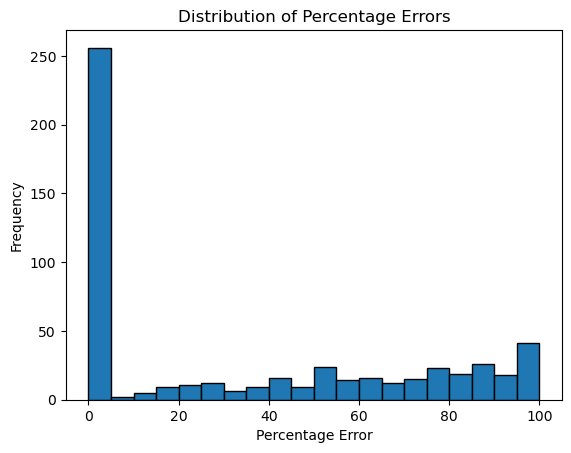

In [42]:
import matplotlib.pyplot as plt

wer_scores = []
with open("wer_scores.csv", mode='r') as file:
    csv_reader = csv.reader(file)
    next(csv_reader)  # Skip header row
    for row in csv_reader:
        wer_scores.append(float(row[2].split('%')[0]))

# Create a histogram
plt.hist(wer_scores, bins=20,edgecolor='k')


# Set labels and title
plt.xlabel('Percentage Error')
plt.ylabel('Frequency')
plt.title('Distribution of Percentage Errors')

# Show the histogram
plt.show()


It's really good to see the error is really small for major of the text sentences. Almost 260/543 text have less than 5% error. It could imporve if we increase the word data dictionary.